In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import random
random.seed(42)
np.random.seed(42)

In [2]:
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler 
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.feature_selection import f_regression, mutual_info_regression


In [3]:
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# 1. Feature Preprocessing

In [4]:
file= 'insurance_data.csv'
df=pd.read_csv(file, sep=',',header='infer')
ft0 = ['ft1','ft2','ft3','ft4', 'ft5', 'ft6']
categorical_columns = ['ft4','ft5','ft6']
#### using pandas only for visulization one-hot encoding
# in the training, using 'make_column_transformer' from sklearn
df_encode = pd.get_dummies(data = df, prefix = None, prefix_sep='_',\
                           columns = categorical_columns, drop_first=False)
print(df_encode.head())

   ft1     ft2  ft3      charges  ft4_female  ft4_male  ft5_no  ft5_yes  \
0   19  27.900    0  16884.92400           1         0       0        1   
1   18  33.770    1   1725.55230           0         1       1        0   
2   28  33.000    3   4449.46200           0         1       1        0   
3   33  22.705    0  21984.47061           0         1       1        0   
4   32  28.880    0   3866.85520           0         1       1        0   

   ft6_northeast  ft6_northwest  ft6_southeast  ft6_southwest  
0              0              0              0              1  
1              0              0              1              0  
2              0              0              1              0  
3              0              1              0              0  
4              0              1              0              0  


In [5]:
# one-hot encoding
preprocess1 = make_column_transformer(
    (OneHotEncoder(sparse=False), ['ft4','ft5','ft6']),
    remainder='passthrough' 
)
# standardization and one-hot encoding
preprocess2 = make_column_transformer(
    (OneHotEncoder(sparse=False), ['ft4','ft5','ft6']),
    (StandardScaler(),['ft1','ft2','ft3']),
    remainder='passthrough'
)
# partial standardization and one-hot encoding
preprocess3 = make_column_transformer(
    (OneHotEncoder(sparse=False), ['ft4','ft5','ft6']),
    (StandardScaler(),['ft2','ft3']),
    remainder='passthrough'
)
    
def cv_test(model, X, y, k=10, plot=True):
    # cross validation
    kf = KFold(n_splits=k)
    RMSE_train=[]
    RMSE_test=[]
    for train_index, test_index in kf.split(X):
        X_train= X[train_index]
        y_train= y[train_index]
        X_test= X[test_index]
        y_test= y[test_index]
        reg = model.fit(X_train, y_train)
        pred_train = reg.predict(X_train)
        pred_test = reg.predict(X_test)
        RMSE_train.append(mean_squared_error(y_train, pred_train))
        RMSE_test.append(mean_squared_error(y_test, pred_test))
    print('RMSE for train data=',np.mean(RMSE_train))
    print('RMSE for test data=',np.mean(RMSE_test))
    
    # test
    reg = model.fit(X, y)
    pred= reg.predict(X)
    if plot:
        plt.figure()
        plt.scatter(y, pred, marker='.')
        plt.xlabel('true values')
        plt.ylabel('fitted valuse')
        plt.title('fitted values versus true values')
        plt.show()

        plt.figure()
        plt.scatter(pred, y-pred, marker='.')
        plt.xlabel('fitted valuse')
        plt.ylabel('residuals')
        plt.title('residuals versus fitted values')
        plt.show()
    
    return pred

## (a) Feature Encoding

In [6]:
X1 = preprocess1.fit_transform(df[ft0])
y = df['charges']

RMSE for train data= 36476389.7929434
RMSE for test data= 36990225.36687709


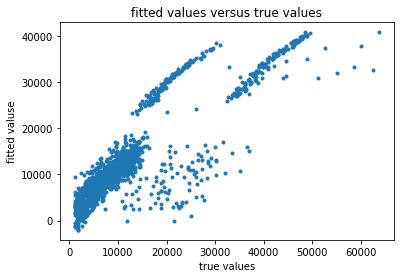

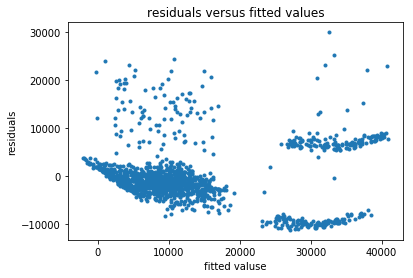

array([25293.7130284 ,  3448.60283431,  6706.9884907 , ...,
        4149.13248568,  1246.58493898, 37085.62326757])

In [7]:
cv_test(LinearRegression(), X1, y, k=10)

## (b) Standardization

In [8]:
X2 = preprocess2.fit_transform(df[ft0])
y = df['charges']

/home/zeyudesk/anaconda3/envs/219project4/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/zeyudesk/anaconda3/envs/219project4/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


RMSE for train data= 36481217.47105126
RMSE for test data= 36992424.82349889


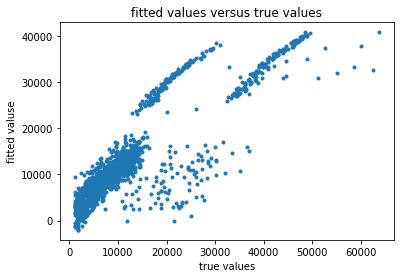

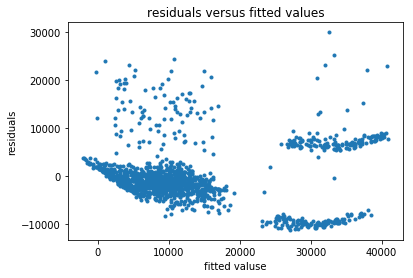

array([25293.7130284 ,  3448.60283431,  6706.9884907 , ...,
        4149.13248568,  1246.58493898, 37085.62326757])

In [9]:
cv_test(LinearRegression(), X2, y, k=10)

## (c) Divide ft1

In [10]:
import copy
df_div = copy.deepcopy(df)
df_div['ft1'] = [1 if x < 30 else (3 if x > 50 else 2) for x in df['ft1']]
df_div.head()

,ft1,ft2,ft3,ft4,ft5,ft6,charges
0,1,27.900,0,female,yes,southwest,16884.92400
1,1,33.770,1,male,no,southeast,1725.55230
2,1,33.000,3,male,no,southeast,4449.46200
3,2,22.705,0,male,no,northwest,21984.47061
4,2,28.880,0,male,no,northwest,3866.85520


In [11]:
X3 = preprocess3.fit_transform(df_div[ft0])
y = df_div['charges']

/home/zeyudesk/anaconda3/envs/219project4/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/zeyudesk/anaconda3/envs/219project4/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


RMSE for train data= 38433852.14547484
RMSE for test data= 38928110.476374805


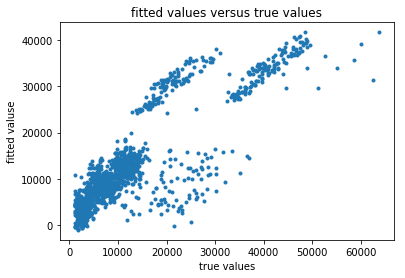

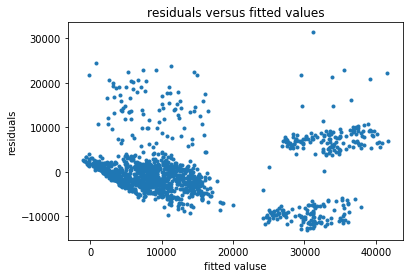

array([26277.51137211,  4697.72093282,  5410.35133017, ...,
        5410.86251845,  1740.36747767, 36039.16004406])

In [12]:
cv_test(LinearRegression(), X3, y, k=10)

# 2. Correlation exploration

## (a)

In [13]:
preprocess = make_column_transformer(
    (OrdinalEncoder(), ['ft4','ft5','ft6']),
    remainder='passthrough' 
)

In [14]:
X = preprocess.fit_transform(df[ft0])
print(preprocess.transformers_[0][1].categories_)
y = df['charges']

[array(['female', 'male'], dtype=object), array(['no', 'yes'], dtype=object), array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]


In [15]:
print(X[:10,:])

[[ 0.     1.     3.    19.    27.9    0.   ]
 [ 1.     0.     2.    18.    33.77   1.   ]
 [ 1.     0.     2.    28.    33.     3.   ]
 [ 1.     0.     1.    33.    22.705  0.   ]
 [ 1.     0.     1.    32.    28.88   0.   ]
 [ 0.     0.     2.    31.    25.74   0.   ]
 [ 0.     0.     2.    46.    33.44   1.   ]
 [ 0.     0.     1.    37.    27.74   3.   ]
 [ 1.     0.     0.    37.    29.83   2.   ]
 [ 0.     0.     1.    60.    25.84   0.   ]]


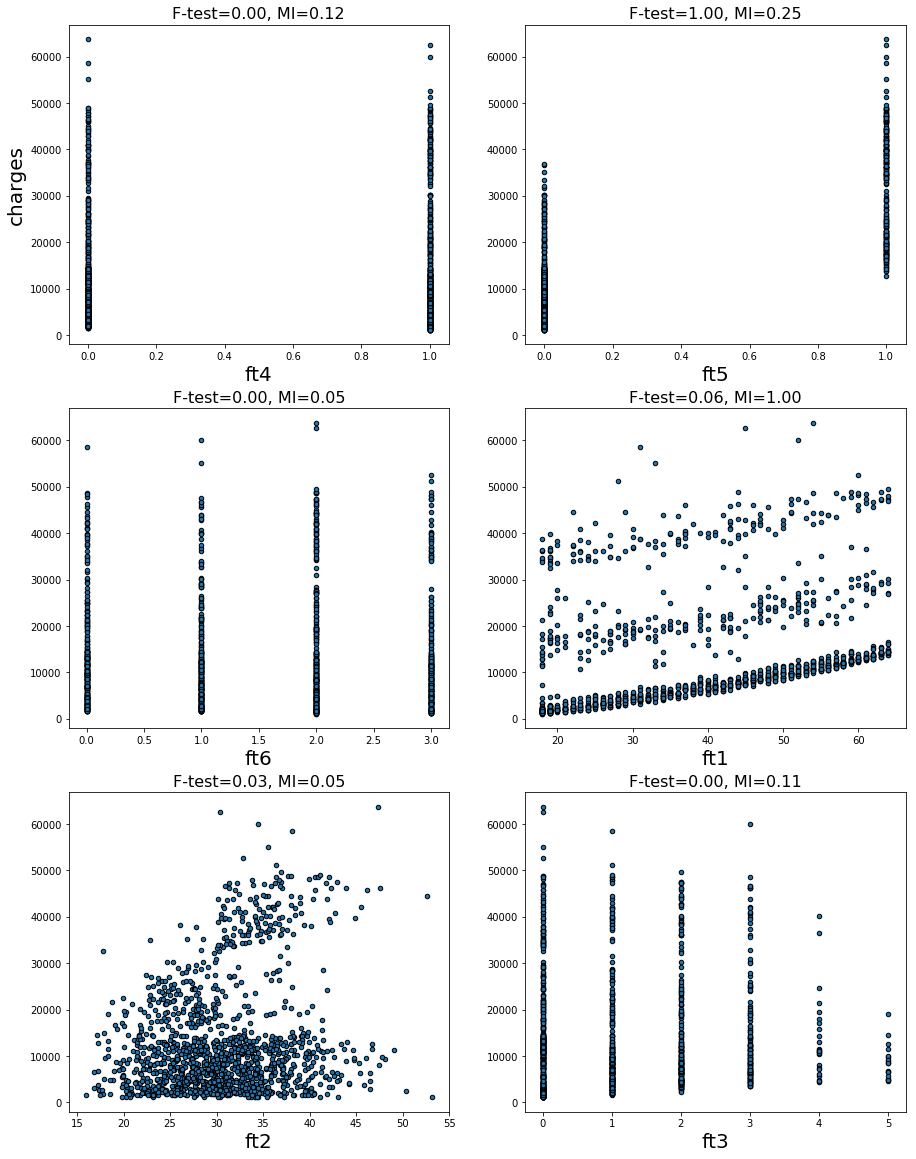

In [16]:
fts = ['ft4','ft5','ft6', 'ft1','ft2','ft3']
f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

plt.figure(figsize=(15, 20))
for i in range(6):
    plt.subplot(3, 2, i + 1)
    plt.scatter(X[:, i], y, edgecolor='black', s=20)
    plt.xlabel("{:s}".format(fts[i]), fontsize=20)
    if i == 0:
        plt.ylabel("charges", fontsize=20)
    plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[i], mi[i]),
              fontsize=16)
plt.show()

## (b) (c)

Text(0, 0.5, 'charges')

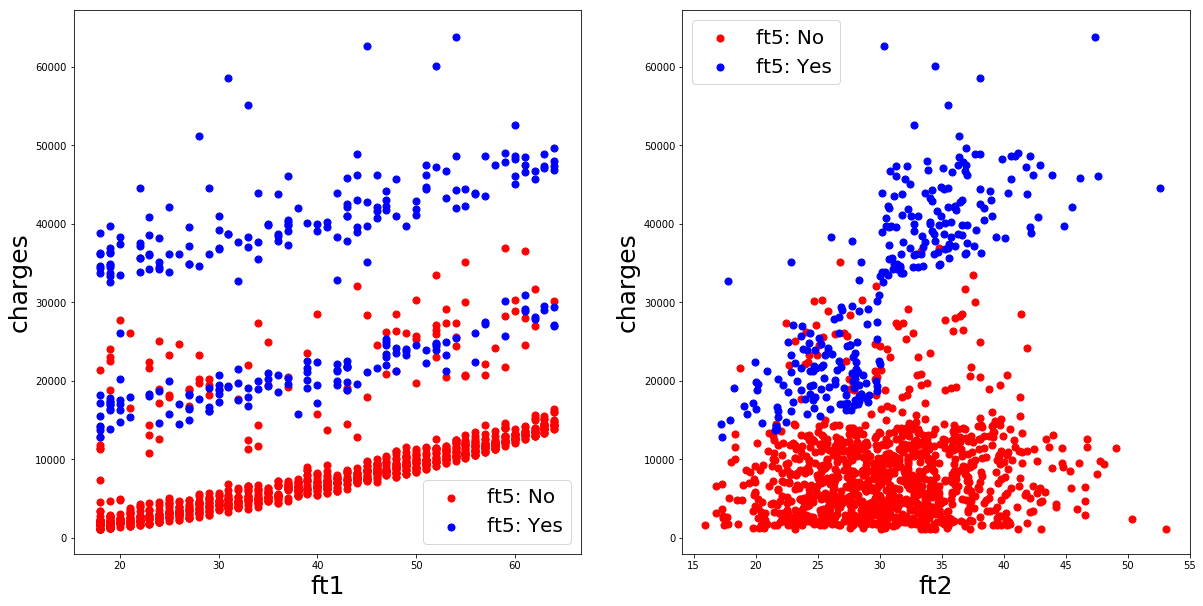

In [17]:
mask1 = X[:,1]==0
mask2 = X[:,1]==1
plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.scatter(X[mask1,3], y[mask1], s=50, c='red', label='ft5: No')
plt.scatter(X[mask2,3], y[mask2], s=50, c='blue', label='ft5: Yes')
plt.legend(fontsize=20)
plt.xlabel("{:s}".format(fts[3]), fontsize=25)
plt.ylabel("charges", fontsize=25)

plt.subplot(122)
plt.scatter(X[mask1,4], y[mask1], s=50, c='red', label='ft5: No')
plt.scatter(X[mask2,4], y[mask2], s=50, c='blue', label='ft5: Yes')
plt.legend(fontsize=20)
plt.xlabel("{:s}".format(fts[4]), fontsize=25)
plt.ylabel("charges", fontsize=25)

# 3. Modify the target variable

## (a) Linear regression

In [18]:
# choose preprocessing in 1(b)
X = preprocess2.fit_transform(df[ft0])
y = df['charges']
y_log = np.log(y)

/home/zeyudesk/anaconda3/envs/219project4/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/zeyudesk/anaconda3/envs/219project4/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


RMSE for train data= 69815322.81386043
RMSE for test data= 71109932.77249804


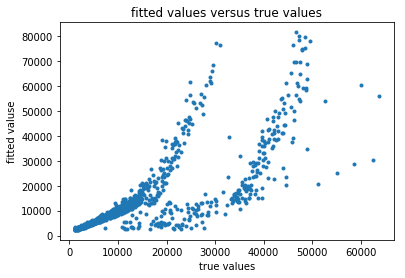

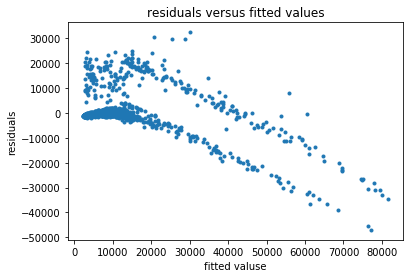

In [19]:
kf = KFold(n_splits=10)
RMSE_train=[]
RMSE_test=[]
for train_index, test_index in kf.split(X):
    X_train= X[train_index]
    y_train= y_log[train_index]
    X_test= X[test_index]
    y_test= y_log[test_index]
    reg = LinearRegression().fit(X_train, y_train)
    pred_train = reg.predict(X_train)
    pred_test = reg.predict(X_test)
    RMSE_train.append(mean_squared_error(y[train_index], np.exp(pred_train)))
    RMSE_test.append(mean_squared_error(y[test_index], np.exp(pred_test)))
print('RMSE for train data=',np.mean(RMSE_train))
print('RMSE for test data=',np.mean(RMSE_test))

# test
reg = LinearRegression().fit(X, y_log)
pred= np.exp(reg.predict(X))
plt.figure()
plt.scatter(y, pred, marker='.')
plt.xlabel('true values')
plt.ylabel('fitted valuse')
plt.title('fitted values versus true values')
plt.show()

plt.figure()
plt.scatter(pred, y-pred, marker='.')
plt.xlabel('fitted valuse')
plt.ylabel('residuals')
plt.title('residuals versus fitted values')
plt.show()

## (b) Correlation

In [20]:
preprocess = make_column_transformer(
    (OrdinalEncoder(), ['ft4','ft5','ft6']),
    remainder='passthrough' 
)

In [21]:
X = preprocess.fit_transform(df[ft0])
print(preprocess.transformers_[0][1].categories_)
y = df['charges']
y_log = np.log(y)

[array(['female', 'male'], dtype=object), array(['no', 'yes'], dtype=object), array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]


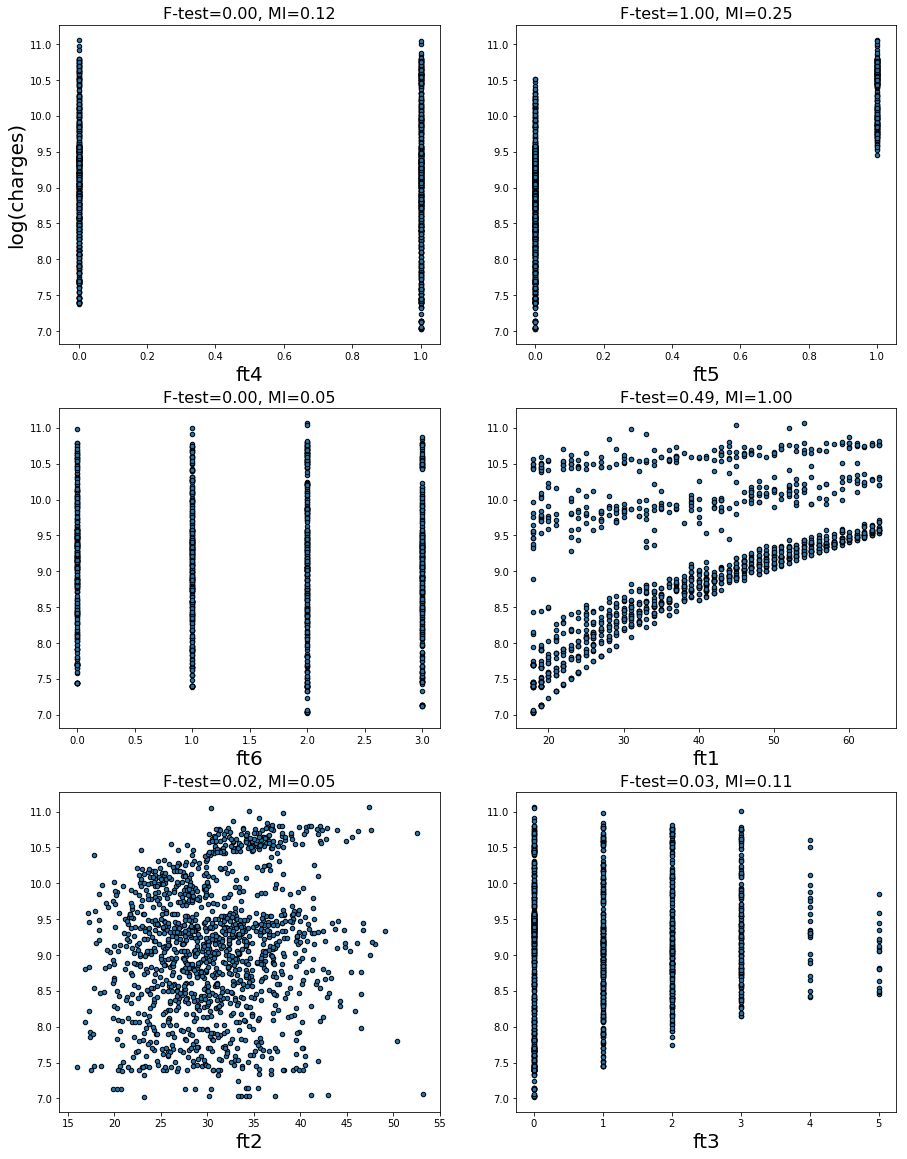

In [22]:
fts = ['ft4','ft5','ft6', 'ft1','ft2','ft3']
f_test, _ = f_regression(X, y_log)
f_test /= np.max(f_test)

mi = mutual_info_regression(X, y_log)
mi /= np.max(mi)

plt.figure(figsize=(15, 20))
for i in range(6):
    plt.subplot(3, 2, i + 1)
    plt.scatter(X[:, i], y_log, edgecolor='black', s=20)
    plt.xlabel("{:s}".format(fts[i]), fontsize=20)
    if i == 0:
        plt.ylabel("log(charges)", fontsize=20)
    plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[i], mi[i]),
              fontsize=16)
plt.show()

Text(0, 0.5, 'charges')

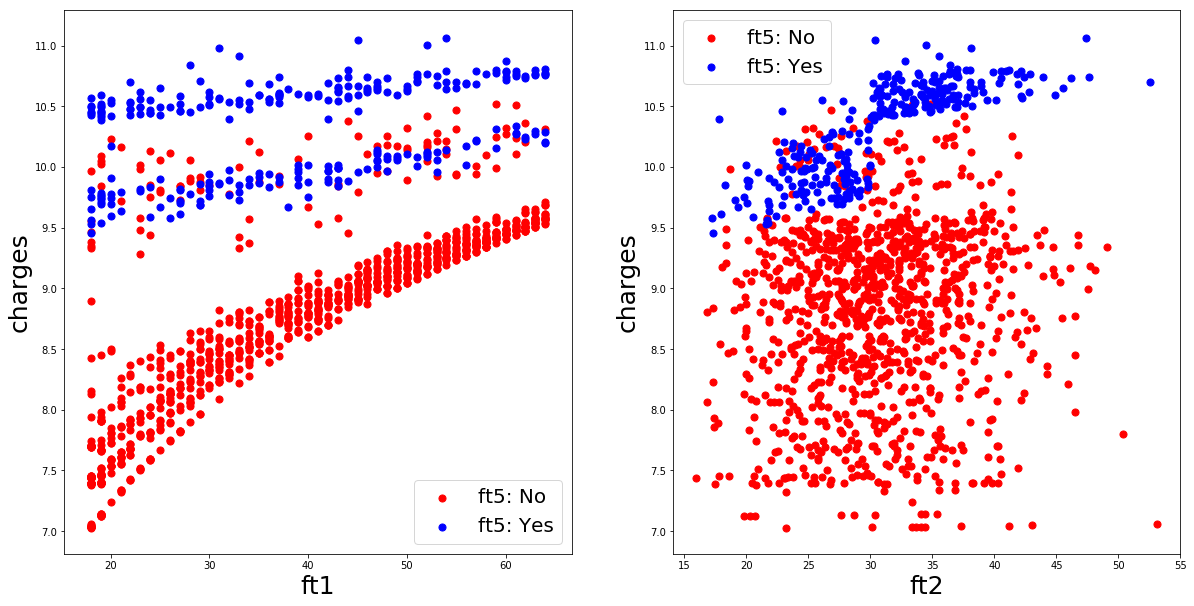

In [23]:
mask1 = X[:,1]==0
mask2 = X[:,1]==1
plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.scatter(X[mask1,3], y_log[mask1], s=50, c='red', label='ft5: No')
plt.scatter(X[mask2,3], y_log[mask2], s=50, c='blue', label='ft5: Yes')
plt.legend(fontsize=20)
plt.xlabel("{:s}".format(fts[3]), fontsize=25)
plt.ylabel("charges", fontsize=25)

plt.subplot(122)
plt.scatter(X[mask1,4], y_log[mask1], s=50, c='red', label='ft5: No')
plt.scatter(X[mask2,4], y_log[mask2], s=50, c='blue', label='ft5: Yes')
plt.legend(fontsize=20)
plt.xlabel("{:s}".format(fts[4]), fontsize=25)
plt.ylabel("charges", fontsize=25)